In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

(1000, 2)
(800, 2) (200, 2) (800, 1) (200, 1)


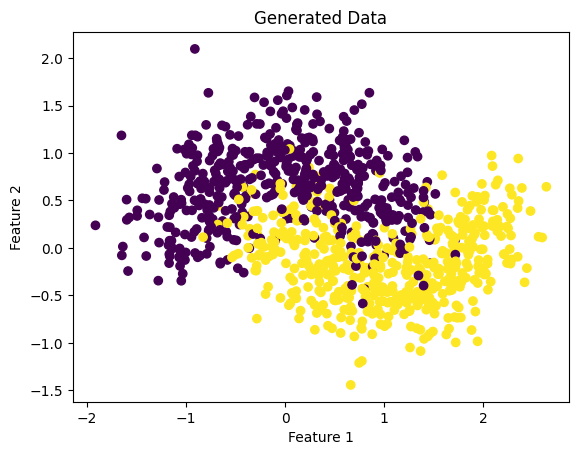

In [45]:
def gen_data(n=1000, noise=.3, t_size=.2):
    data = datasets.make_moons(n, noise=noise, random_state=1)

    X=data[0]
    y=data[1].reshape(-1,1)

    print(X.shape)

    plt.scatter(X.T[0], X.T[1], c=y.T)
    plt.title('Generated Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    #plt.show()

    return train_test_split(X, y, test_size=t_size, random_state=1)

X_train, X_test, y_train, y_test = gen_data(1000, .3, .2) 


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




In [36]:
class NeuralNetwork:
    def __init__(self, n_features, n_neurons, n_output):
        np.random.seed(1)
        self.w1 = np.random.randn(n_features, n_neurons)

        np.random.seed(2)
        self.w2 = np.random.randn(n_neurons, n_output)

        #learning rate
        self.lr = 0.01


    def calc_loss(self, y_hat, y):
        return ((y-y_hat)**2).mean()


    def plot_loss(self, loss):
        plt.plot(loss.keys(), loss.values())
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid
        plt.show()

    def sigmoid (self, x):
        return 1.0 / (1.0 + np.exp(-x))


    def d_sigmoid(self, x):
        return x * (1 - x)


    def feedforward(self, X):
        self.layer1 = self.sigmoid(X @ self.w1)
        self.output = self.sigmoid(self.layer1 @ self.w2)


    def backpropagation(self, X, y):
        d2 = self.output - y
        d1 = (self.w2 @ d2.T).T * self.d_sigmoid(self.layer1)

        w1_d = X.T @ d1
        w2_d = self.layer1.T @ d2

        self.w1 -= self.lr * w1_d
        self.w2 -= self.lr * w2_d

    def fit(self, X, y, epochs=1, lr=0.01):
        self.lr = lr

        loss_dict = {}

        for i in range(epochs):
            np.random.seed(1)
            self.feedforward(X)
            self.backpropagation(X_train, y_train)

            loss = self.calc_loss(self.output, y_train)
            loss_dict[i] = loss   

            if (i+1) % 100 == 0:
                train_preds = self.predict(X_train).round()
                test_preds = self.predict(X_test).round()

                train_acc = round(accuracy_score(train_preds, y_train), 4)
                test_acc = round(accuracy_score(test_preds, y_test), 4)

                print(f'Epoch: {i+1} | Loss: {round(loss, 3)} | Train Acc: {train_acc} | Test Acc: {test_acc}')

        self.plot_loss(loss_dict)


    def predict(self, X):
        self.feedforward(X)
        return self.output      

Epoch: 100 | Loss: 0.155 | Train Acc: 0.78 | Test Acc: 0.835
Epoch: 200 | Loss: 0.138 | Train Acc: 0.7962 | Test Acc: 0.845
Epoch: 300 | Loss: 0.129 | Train Acc: 0.8062 | Test Acc: 0.845
Epoch: 400 | Loss: 0.124 | Train Acc: 0.8188 | Test Acc: 0.855
Epoch: 500 | Loss: 0.121 | Train Acc: 0.825 | Test Acc: 0.86
Epoch: 600 | Loss: 0.119 | Train Acc: 0.825 | Test Acc: 0.87
Epoch: 700 | Loss: 0.117 | Train Acc: 0.8288 | Test Acc: 0.87
Epoch: 800 | Loss: 0.117 | Train Acc: 0.8325 | Test Acc: 0.875
Epoch: 900 | Loss: 0.116 | Train Acc: 0.83 | Test Acc: 0.875
Epoch: 1000 | Loss: 0.116 | Train Acc: 0.83 | Test Acc: 0.875


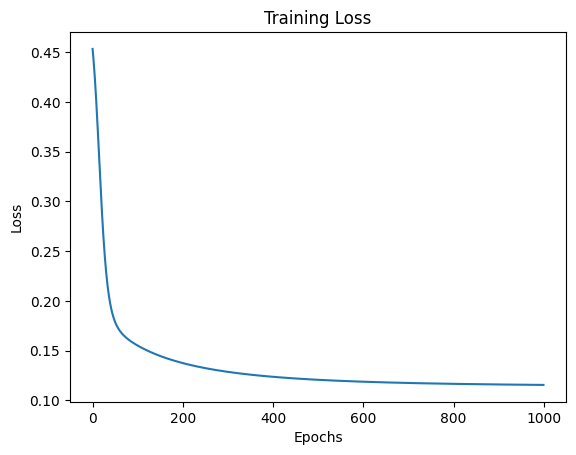

In [48]:
nn = NeuralNetwork(2, 10, 1)  # Adjusting n_features and n_output

nn.fit(X_train, y_train, epochs=1000, lr=0.0001)